<h1 style="text-align:center">Loan Default Prediction Model</h1>

### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.

### Data Overview

----
-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler ,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

## Loading Features Information

In [2]:
data_info = pd.read_csv('lending_club_info.csv',index_col='LoanStatNew')

In [3]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [4]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [5]:
feat_info('mort_acc')

Number of mortgage accounts.


## Loading the Data

In [6]:
df = pd.read_csv("lending_club_loan_two.csv")
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

# Exploratory Data Analysis

**Let's see the correlation between some features**

<Axes: >

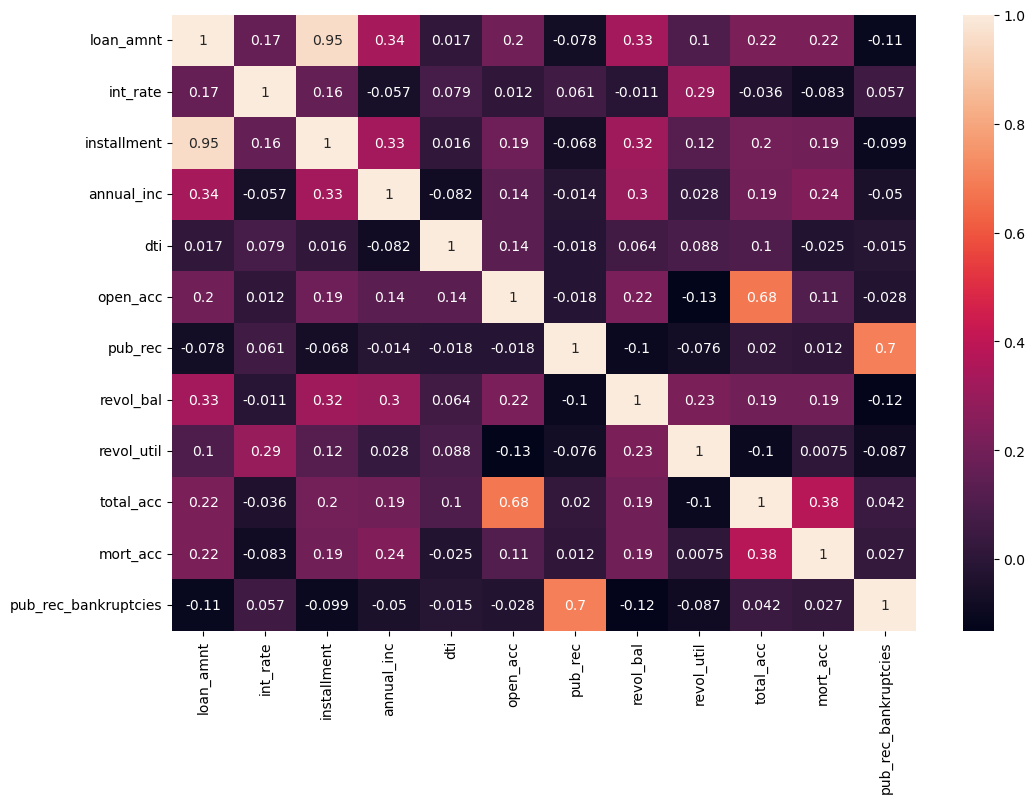

In [8]:
corr_matrix = df.select_dtypes(np.number).corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True)

**Now let's see the ratio between loan status**

<Axes: xlabel='loan_status', ylabel='count'>

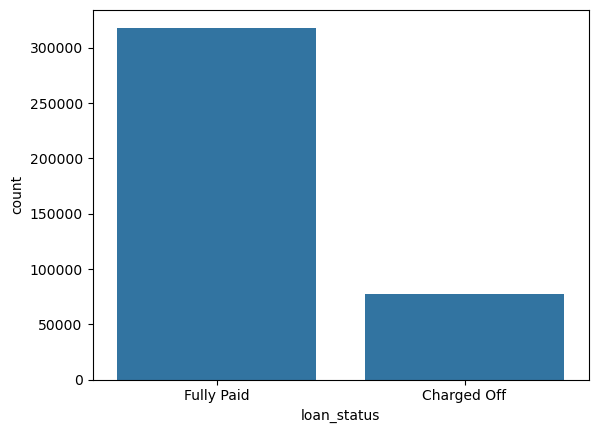

In [9]:
sns.countplot(df, x = "loan_status")

**histogram of the loans amount**

<Axes: xlabel='loan_amnt', ylabel='Count'>

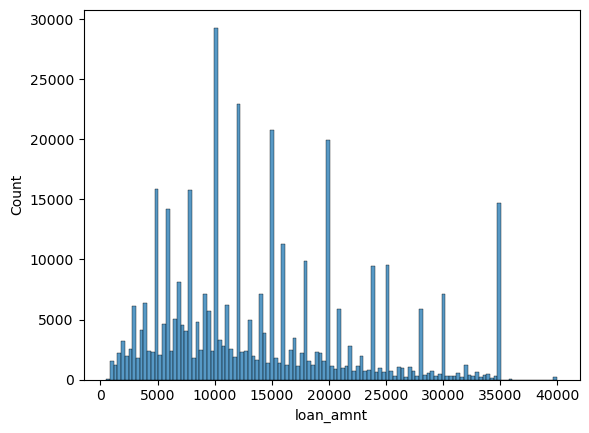

In [10]:
sns.histplot(df["loan_amnt"])

**Loan Status based on the loan amount**

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

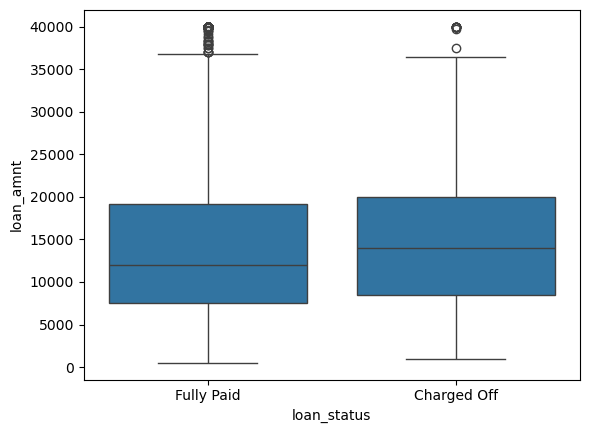

In [11]:
sns.boxplot(df, x = "loan_status", y="loan_amnt")

In [12]:
df.groupby(by="loan_status").describe()["loan_amnt"]

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


`Borrowers that charging off are taking "slightly" more loan amount than fully paing borrowers`

**Is their a relation between the loan amount and the grade of the borrower?**

<Axes: xlabel='grade', ylabel='loan_amnt'>

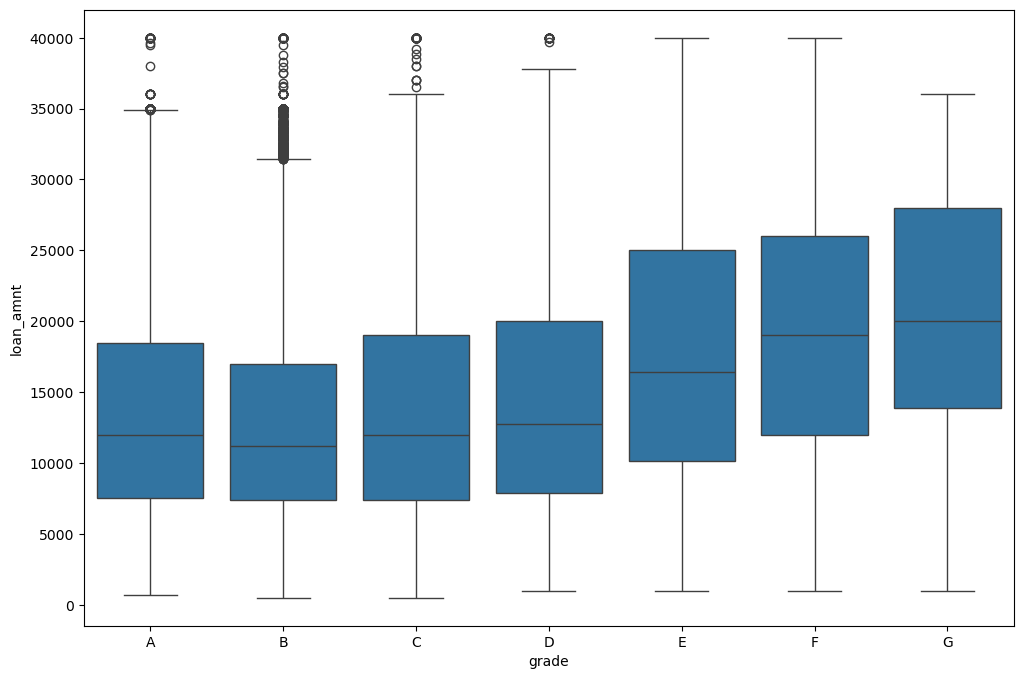

In [13]:
plt.figure(figsize=(12, 8))
sns.boxplot(df.sort_values(by="grade"), x = "grade", y = "loan_amnt")

`Almost the risk level increase with the increase of the loan amount`

**Grade and sub-grade distributions**

<Axes: xlabel='grade', ylabel='count'>

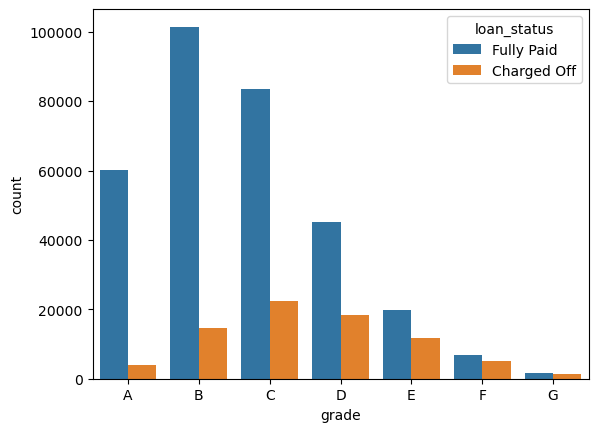

In [14]:
sns.countplot(df.sort_values(by="grade"), x = "grade", hue = "loan_status")

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17364\1030970175.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df.sort_values(by="sub_grade"), x="sub_grade", palette='coolwarm', ax=ax[0])


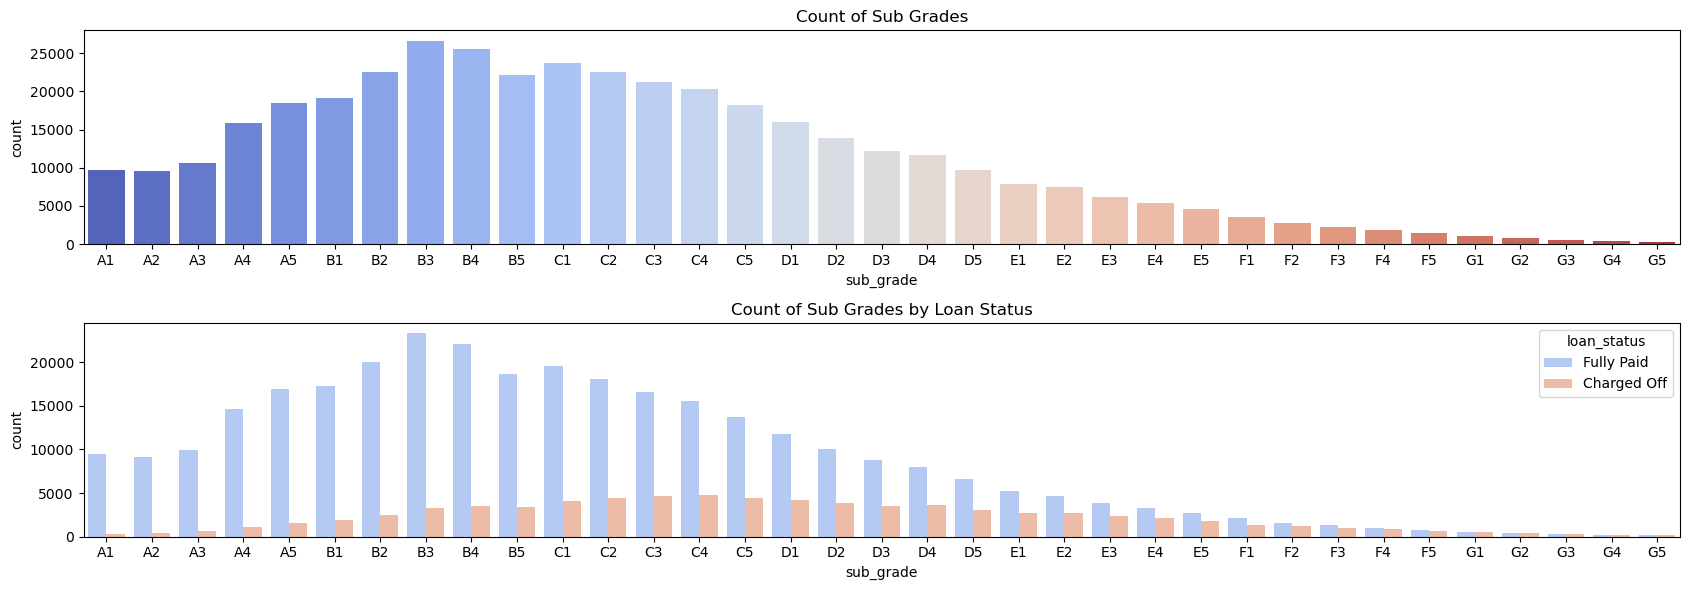

In [15]:

fig, ax = plt.subplots(2,1, figsize=(17, 6))

sns.countplot(data=df.sort_values(by="sub_grade"), x="sub_grade", palette='coolwarm', ax=ax[0])
ax[0].set_title('Count of Sub Grades')

sns.countplot(data=df.sort_values(by="sub_grade"), x="sub_grade", palette='coolwarm', hue="loan_status", ax=ax[1])
ax[1].set_title('Count of Sub Grades by Loan Status')

plt.tight_layout()

`Almost most of the borrowers are from grade B & C`

**Let's focus on the most risky grades "F & G"**

Text(0.5, 1.0, 'Count of Sub Grades by Loan Status (Risk Grades F and G)')

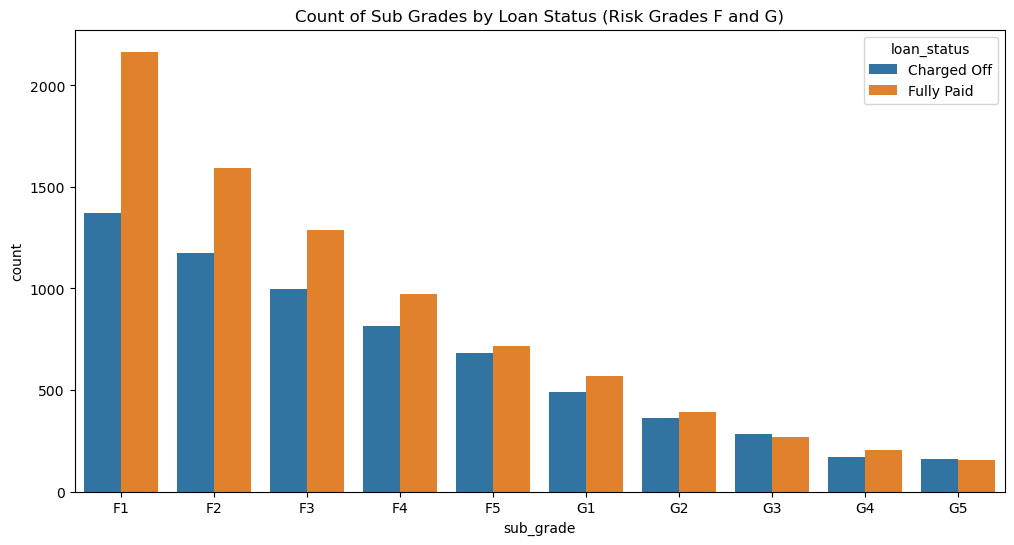

In [16]:
risk_grades = ["F", "G"]

filtered_df = df[df["grade"].isin(risk_grades)]

plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_df.sort_values(by="sub_grade"), x="sub_grade", hue="loan_status")
plt.title('Count of Sub Grades by Loan Status (Risk Grades F and G)')

**Home ownership and the loan status**

<Axes: xlabel='home_ownership', ylabel='count'>

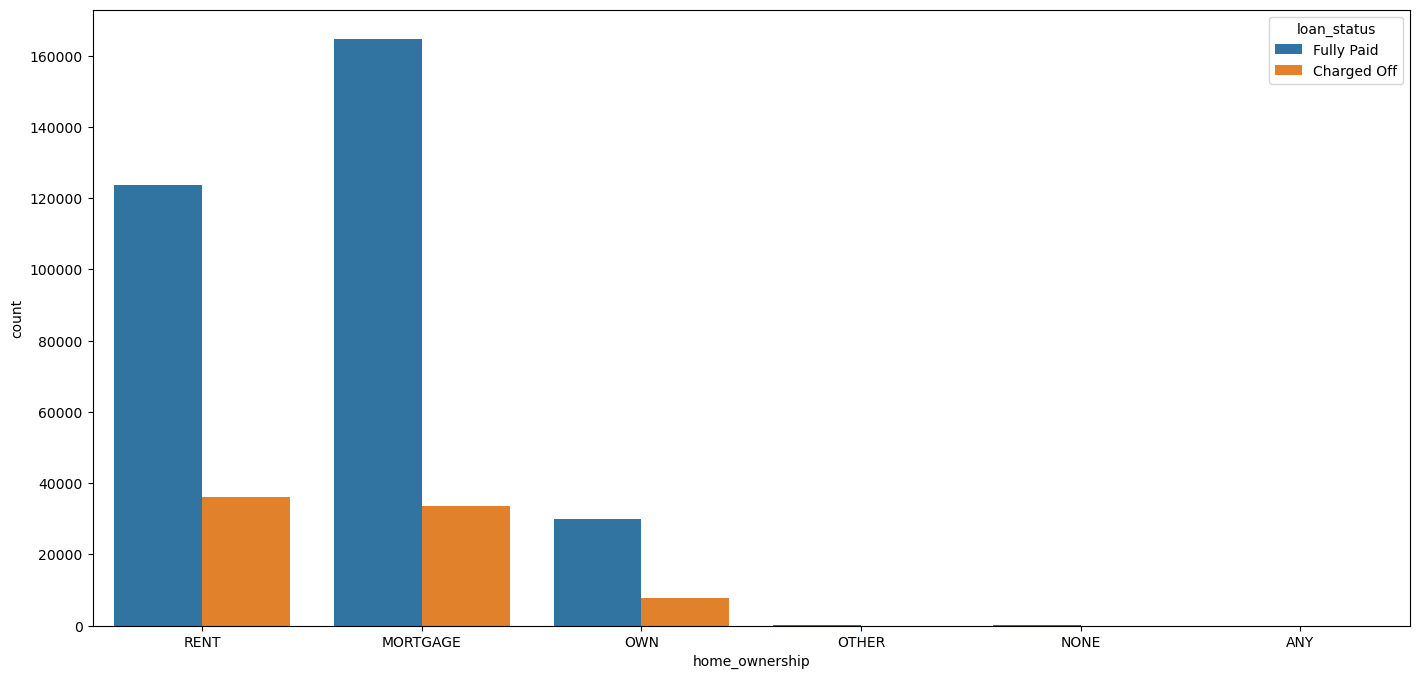

In [17]:
plt.figure(figsize=(17, 8))
sns.countplot(df, x="home_ownership", hue = "loan_status")

`The percentage of home ownership borrowers:`

In [18]:
total_rows = df.shape[0]

for home_type, count in df["home_ownership"].value_counts().items():
    percentage = (count / total_rows) * 100
    print(home_type, ":", round(percentage, 2), "%")

MORTGAGE : 50.08 %
RENT : 40.35 %
OWN : 9.53 %
OTHER : 0.03 %
NONE : 0.01 %
ANY : 0.0 %


**Home ownership and the loan amount**

<Axes: xlabel='home_ownership', ylabel='loan_amnt'>

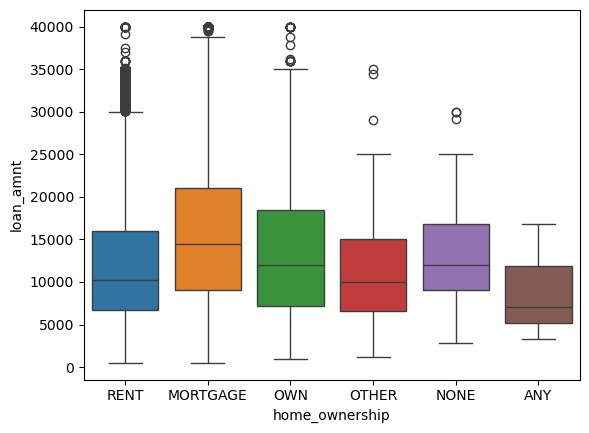

In [19]:
sns.boxplot(df, x = "home_ownership", y="loan_amnt", hue = "home_ownership")

`Borrowers with Mortgage home ownership are more likely to borrow a larger amount`

**Installment based on the loan amount**

<Axes: xlabel='installment', ylabel='loan_amnt'>

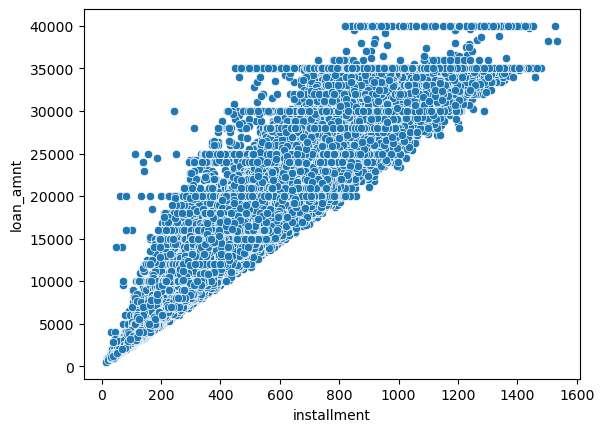

In [20]:
sns.scatterplot(df, x = "installment", y = "loan_amnt")

**Now let's create a new column "loan_repaid" containing 1 if the loan status is fully paid and 0 otherwise**

In [21]:
df["loan_repaid"] = df["loan_status"].apply(lambda status: 1 if status == "Fully Paid" else 0)
df[["loan_repaid", "loan_status"]]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


**Correlation of the features with loan_repaid**

<Axes: >

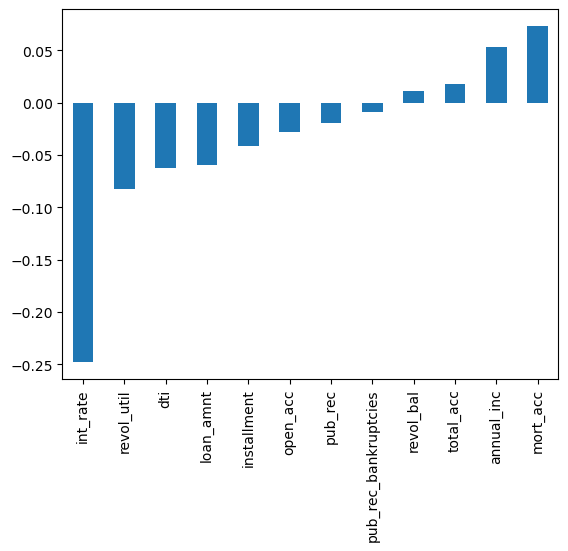

In [22]:
loan_repaid_corr = df.select_dtypes(np.number).corr()["loan_repaid"][:-1].sort_values()
loan_repaid_corr.plot(kind="bar")

# Data Preprocessing

**Rows Containing missing values**

In [23]:
missing_rows_num= df[df.isna().any(axis=1)].shape[0]
total_rows = df.shape[0]
print(f"Rows with missing features is {round((missing_rows_num / total_rows) * 100, 2)}% of the total data")

Rows with missing features is 15.19% of the total data


**Cols with missing values**

In [24]:
missing_cols= pd.Series(df.isna().sum().sort_values(ascending=False))
missing_cols_pct = missing_cols.apply(lambda count: round((count / total_rows)*100, 2))
missing_cols_pct

mort_acc                9.54
emp_title               5.79
emp_length              4.62
title                   0.44
pub_rec_bankruptcies    0.14
revol_util              0.07
dti                     0.00
address                 0.00
application_type        0.00
initial_list_status     0.00
total_acc               0.00
revol_bal               0.00
pub_rec                 0.00
open_acc                0.00
earliest_cr_line        0.00
loan_amnt               0.00
term                    0.00
purpose                 0.00
loan_status             0.00
issue_d                 0.00
verification_status     0.00
annual_inc              0.00
home_ownership          0.00
sub_grade               0.00
grade                   0.00
installment             0.00
int_rate                0.00
loan_repaid             0.00
dtype: float64

### **Cleaning "emp_title" & "emp_length" features**

**How many unique employment job titles are there?**

In [25]:
df["emp_title"].value_counts()

emp_title
Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: count, Length: 173105, dtype: int64

**Realistically there are too many unique job titles to try to convert this to a dummy variable feature. so removing that emp_title column is better.**

In [26]:
df.drop("emp_title", axis = 1, inplace=True)

**Let's move to "emp_length"**

<Axes: xlabel='emp_length', ylabel='count'>

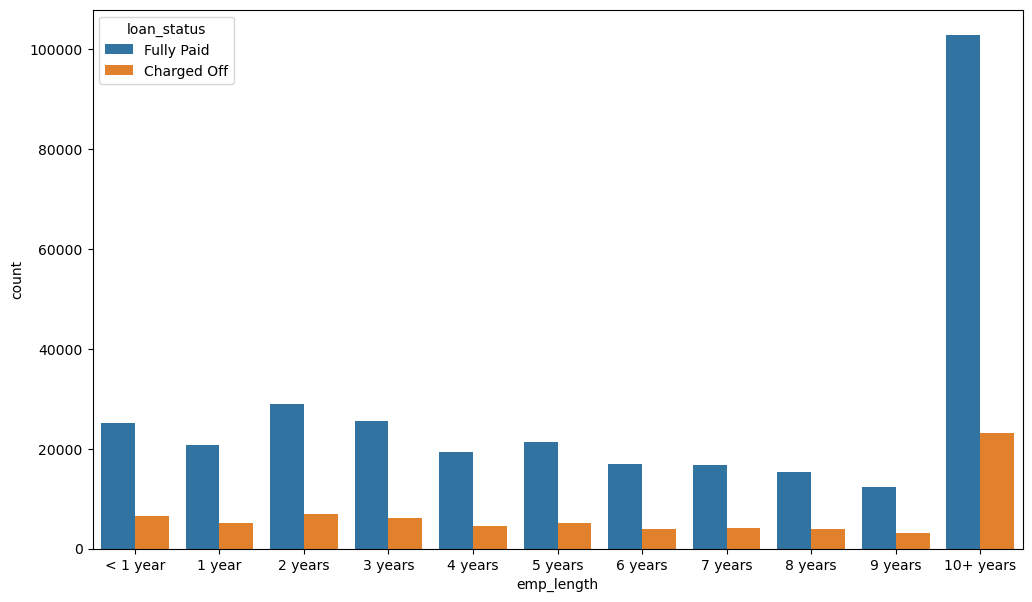

In [27]:
plt.figure(figsize= (12, 7))

emp_length_order = [
    '< 1 year', '1 year', '2 years', '3 years', '4 years', 
    '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years'
]
sns.countplot(df, x = "emp_length", order=emp_length_order, hue="loan_status")

**the percentage of charge offs per category.**

In [28]:
emp_total = df["emp_length"].value_counts()

charged_off_df = df[df["loan_repaid"] == 0]
emp_co = charged_off_df["emp_length"].value_counts()
emp_co_pct = round((emp_co / emp_total), 5)
emp_co_pct

emp_length
1 year       0.19913
10+ years    0.18419
2 years      0.19326
3 years      0.19523
4 years      0.19238
5 years      0.19219
6 years      0.18919
7 years      0.19477
8 years      0.19976
9 years      0.20047
< 1 year     0.20687
Name: count, dtype: float64

<Axes: xlabel='emp_length', ylabel='count'>

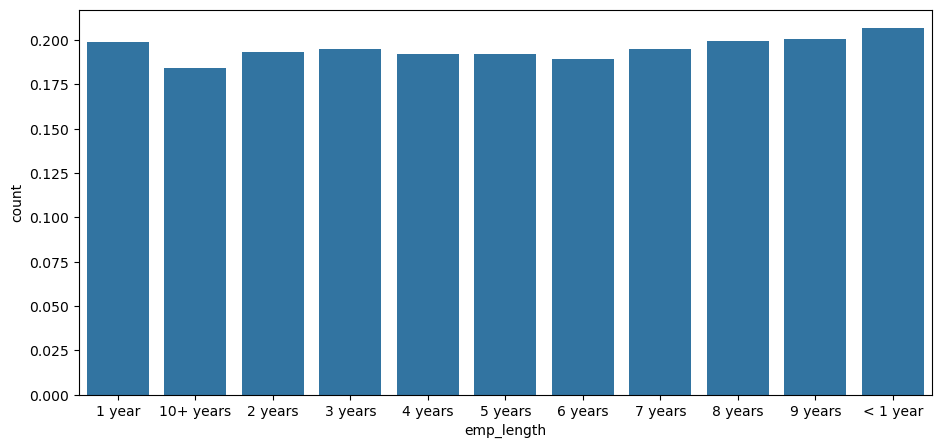

In [29]:
plt.figure(figsize=(11,5))
sns.barplot(emp_co_pct)

**Charge off rates are extremely similar across all employment lengths. it will not affect the model so droping the emp_length column is better.**

In [30]:
df.drop("emp_length", axis = 1, inplace=True)

**Let's see what feature columns still have missing data.**

In [31]:
missing_cols= pd.Series(df.isna().sum().sort_values(ascending=False))
missing_cols_pct = missing_cols.apply(lambda count: round((count / total_rows)*100, 2))
missing_cols_pct

mort_acc                9.54
title                   0.44
pub_rec_bankruptcies    0.14
revol_util              0.07
loan_amnt               0.00
earliest_cr_line        0.00
address                 0.00
application_type        0.00
initial_list_status     0.00
total_acc               0.00
revol_bal               0.00
pub_rec                 0.00
open_acc                0.00
dti                     0.00
term                    0.00
purpose                 0.00
loan_status             0.00
issue_d                 0.00
verification_status     0.00
annual_inc              0.00
home_ownership          0.00
sub_grade               0.00
grade                   0.00
installment             0.00
int_rate                0.00
loan_repaid             0.00
dtype: float64

### **Cleaning "title" feature**

In [32]:
df["purpose"].value_counts()

purpose
debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: count, dtype: int64

**the "title" feature is just subcategory of the "purpose" feature so we'll remove it**

In [33]:
df.drop("title", axis = 1, inplace=True)

### **Cleaning "mort_acc" feature**

**Let's see first what's mort_acc**

In [34]:
feat_info("mort_acc")

Number of mortgage accounts.


In [35]:
df["mort_acc"].value_counts()

mort_acc
0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: count, dtype: int64

**let's see the correlation with "mort_acc"**

In [36]:
mort_acc_corr = df.select_dtypes(np.number).corr()["mort_acc"].sort_values(ascending=False)
mort_acc_corr

mort_acc                1.000000
total_acc               0.381072
annual_inc              0.236320
loan_amnt               0.222315
revol_bal               0.194925
installment             0.193694
open_acc                0.109205
loan_repaid             0.073111
pub_rec_bankruptcies    0.027239
pub_rec                 0.011552
revol_util              0.007514
dti                    -0.025439
int_rate               -0.082583
Name: mort_acc, dtype: float64

**Looks like the total_acc feature correlates with the mort_acc , this makes sense!. We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry.**

In [37]:
print("Mean of mort_acc column per total_acc")
df.select_dtypes(np.number).groupby('total_acc').mean()['mort_acc'].round()

Mean of mort_acc column per total_acc


total_acc
2.0      0.0
3.0      0.0
4.0      0.0
5.0      0.0
6.0      0.0
        ... 
124.0    1.0
129.0    1.0
135.0    3.0
150.0    2.0
151.0    0.0
Name: mort_acc, Length: 118, dtype: float64

In [38]:
total_acc_avg = df.select_dtypes(np.number).groupby('total_acc').mean()['mort_acc'].round()
total_acc_avg[3.0]

0.0

**Let's fill in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc value from the Series we created above.**

In [39]:
def fill_mort_acc(total_acc, mort_acc):
    '''
    Accepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.
    
    total_acc_avg here should be a Series or dictionary containing the mapping of the
    groupby averages of mort_acc per total_acc values.
    '''
    
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [40]:
df["mort_acc"] = df.apply(lambda x: fill_mort_acc(x["total_acc"], x["mort_acc"]), axis=1)

**Let's see what feature columns still have missing data.**

In [41]:
missing_cols= pd.Series(df.isna().sum().sort_values(ascending=False))
missing_cols_pct = missing_cols.apply(lambda count: round((count / total_rows)*100, 2))
missing_cols_pct

pub_rec_bankruptcies    0.14
revol_util              0.07
loan_amnt               0.00
earliest_cr_line        0.00
address                 0.00
mort_acc                0.00
application_type        0.00
initial_list_status     0.00
total_acc               0.00
revol_bal               0.00
pub_rec                 0.00
open_acc                0.00
dti                     0.00
term                    0.00
purpose                 0.00
loan_status             0.00
issue_d                 0.00
verification_status     0.00
annual_inc              0.00
home_ownership          0.00
sub_grade               0.00
grade                   0.00
installment             0.00
int_rate                0.00
loan_repaid             0.00
dtype: float64

**revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data. So we'll go ahead and remove the rows that are missing those values in those columns.**

In [42]:
df = df.dropna()

## Trying to fill the missing mort_acc values by prediction model

In [43]:
df_dummies = pd.get_dummies(df, columns=["term", "grade", "home_ownership", "verification_status", "initial_list_status", "verification_status"], drop_first=True, dtype=int)
df_dummies

,loan_amnt,int_rate,installment,sub_grade,annual_inc,issue_d,loan_status,purpose,dti,earliest_cr_line,...,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,initial_list_status_w,verification_status_Source Verified,verification_status_Verified
0,10000.0,11.44,329.48,B4,117000.0,Jan-2015,Fully Paid,vacation,26.24,Jun-1990,...,0,0,0,0,1,0,0,1,0,0
1,8000.0,11.99,265.68,B5,65000.0,Jan-2015,Fully Paid,debt_consolidation,22.05,Jul-2004,...,1,0,0,0,0,0,0,0,0,0
2,15600.0,10.49,506.97,B3,43057.0,Jan-2015,Fully Paid,credit_card,12.79,Aug-2007,...,0,0,0,0,1,1,0,0,1,0
3,7200.0,6.49,220.65,A2,54000.0,Nov-2014,Fully Paid,credit_card,2.60,Sep-2006,...,0,0,0,0,1,0,0,0,0,0
4,24375.0,17.27,609.33,C5,55000.0,Apr-2013,Charged Off,credit_card,33.95,Mar-1999,...,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,10.99,217.38,B4,40000.0,Oct-2015,Fully Paid,debt_consolidation,15.63,Nov-2004,...,0,0,0,0,1,1,0,1,1,0
396026,21000.0,12.29,700.42,C1,110000.0,Feb-2015,Fully Paid,debt_consolidation,21.45,Feb-2006,...,1,0,0,0,0,1,0,0,1,0
396027,5000.0,9.99,161.32,B1,56500.0,Oct-2013,Fully Paid,debt_consolidation,17.56,Mar-1997,...,0,0,0,0,1,0,1,0,0,1
396028,21000.0,15.31,503.02,C2,64000.0,Aug-2012,Fully Paid,debt_consolidation,15.88,Nov-1990,...,1,0,0,0,0,0,1,0,0,1


In [44]:
mort_acc_corr = df_dummies.select_dtypes(np.number).corr()["mort_acc"].sort_values(ascending=False)
mort_acc_corr

mort_acc                               1.000000
home_ownership_MORTGAGE                0.463914
total_acc                              0.400125
annual_inc                             0.232799
loan_amnt                              0.224033
revol_bal                              0.198821
installment                            0.196688
open_acc                               0.131838
term_ 60 months                        0.094104
verification_status_Verified           0.079826
verification_status_Verified           0.079826
loan_repaid                            0.068752
initial_list_status_w                  0.036219
pub_rec_bankruptcies                   0.029318
pub_rec                                0.014077
grade_B                                0.007088
revol_util                             0.005813
home_ownership_NONE                    0.001598
home_ownership_OTHER                  -0.001658
grade_G                               -0.004660
verification_status_Source Verified   -0

**rows with filled "mort_acc"**

In [45]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

def train_xgboost(X, y, tune_hyperparameters=False):
    """
    Train an XGBoost model and return the model, y_test, and y_pred.

    Parameters:
    - X: Features (DataFrame or array-like)
    - y: Target (Series or array-like)
    - tune_hyperparameters: Whether to perform hyperparameter tuning using GridSearchCV (default: False)

    Returns:
    - model: Trained XGBoost model
    - y_test: True target values for the test set
    - y_pred: Predicted target values for the test set
    """
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    if tune_hyperparameters:
        # Define the parameter grid for GridSearchCV
        param_grid = {
            'n_estimators': [100, 200, 300],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7],
            'subsample': [0.6, 0.8, 1.0],
            'colsample_bytree': [0.6, 0.8, 1.0]
        }

        # Initialize GridSearchCV
        grid_search = GridSearchCV(
            XGBRegressor(random_state=42),
            param_grid,
            cv=5,
            scoring='r2',
            n_jobs=-1,
            verbose=1
        )

        # Fit the model with GridSearchCV
        grid_search.fit(X_train, y_train)

        # Get the best model
        model = grid_search.best_estimator_
        print("Best Parameters:", grid_search.best_params_)
    else:
        # Initialize and train the XGBoost model without hyperparameter tuning
        model = XGBRegressor(random_state=42, n_estimators=200, learning_rate=0.1, max_depth=5)
        model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Print evaluation metrics
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("R2 Score:", r2_score(y_test, y_pred))

    return model, y_pred, y_test


In [46]:
correlated_features = ["home_ownership_MORTGAGE", "total_acc", "annual_inc", 
                    "loan_amnt", "revol_bal", "installment", "open_acc", "int_rate", "dti", "mort_acc"]

filled_mort_acc = df_dummies[df_dummies['mort_acc'].notna()]
filled_mort_acc = filled_mort_acc[correlated_features]

filled_mort_acc['loan_inc_ratio'] = filled_mort_acc['loan_amnt'] / (filled_mort_acc['annual_inc'] + 1e-5)  # Loan amount to income ratio
filled_mort_acc['int_rate_dti'] = filled_mort_acc['int_rate'] * filled_mort_acc['dti']  # Interest rate multiplied by DTI
filled_mort_acc['installment_inc_ratio'] = filled_mort_acc['installment'] / (filled_mort_acc['annual_inc'] + 1e-5)  # Installment to income ratio

missed_mort_acc = df_dummies[df_dummies['mort_acc'].isna()]

model, y_pred, y_test = train_xgboost(filled_mort_acc.drop("mort_acc", axis = 1), filled_mort_acc["mort_acc"])



MSE: 2.5670544344052915
R2 Score: 0.40198164034453976


## Categorical Variables and Dummy Variables
**We're done working with the missing data! Now we just need to deal with the string values due to the categorical columns.**

**Let's list these categorical features**

In [47]:
df.select_dtypes(["object"]).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

---
**Let's now go through all the string features to see what we should do with them.**

---


### term feature

**Let's Convert the term feature into either a 36 or 60 integer numeric data type.**

In [48]:
df["term"].value_counts()

term
36 months    301247
60 months     93972
Name: count, dtype: int64

In [49]:
df["term"] = df["term"].apply(lambda x: int(x[:3]))

### grade feature

**We already know grade is part of sub_grade, so just drop the grade feature.**

In [50]:
df.drop("grade", axis = 1, inplace= True)

In [51]:
subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)

In [52]:
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [53]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

**Let's list the remainig categorical features**

In [54]:
df.select_dtypes(["object"]).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

### verification_status, application_type,initial_list_status,purpose 
**Let's Convert these columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables and concatenate them with the original dataframe.**

In [55]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose']], drop_first=True)
df.drop(['verification_status', 'application_type','initial_list_status','purpose'], inplace=True, axis=1)

df = pd.concat([df, dummies], axis=1)
df.head(3)

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,issue_d,loan_status,dti,earliest_cr_line,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,10000.0,36,11.44,329.48,RENT,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,...,False,False,False,False,False,False,False,False,True,False
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,...,False,False,False,False,False,False,False,False,False,False
2,15600.0,36,10.49,506.97,RENT,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,...,False,False,False,False,False,False,False,False,False,False


### home_ownership
**Let's Review the value_counts for the home_ownership column.**

In [56]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: count, dtype: int64

**Now Convert these to dummy variables with replacing NONE and ANY with OTHER, so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER.**

In [57]:
df['home_ownership']=df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,dummies],axis=1)

### address
**Let's feature engineer a zip code column from the address in the data set. we'll Create a column called 'zip_code' that extracts the zip code from the address column.**

In [58]:
df["zip_code"] = df["address"].apply(lambda address: address[-5:])

In [59]:
df["zip_code"].value_counts()

zip_code
70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: count, dtype: int64

**Now let's make this zip_code column into dummy variables**

In [60]:
dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop(['zip_code','address'],axis=1)
df = pd.concat([df,dummies],axis=1)

### issue_d 

**This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, so we drop this feature.**

In [61]:
df.drop("issue_d", inplace=True, axis = 1)

### earliest_cr_line
**This appears to be a historical time stamp feature. so we Extract the year from this feature, then convert it to a numeric feature. we set this new data to a feature column called 'earliest_cr_year'.Then drop the earliest_cr_line feature.**

In [62]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df = df.drop('earliest_cr_line',axis=1)

## loan_status
**We'll drop the load_status column, since its a duplicate of the loan_repaid column we've created earlier.**

In [63]:
df.drop("loan_status", axis = 1, inplace=True)

# Creating the model

**Define Dependent and Independent variables**

In [114]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

**Train test split**

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

**Normalize the data**

In [66]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**preparing the model**

In [67]:
df.shape[1]

79

In [68]:
model = Sequential()

model.add(Dense(78, activation = "relu"))
model.add(Dropout(0.2))

model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.2))

model.add(Dense(32, activation = "relu"))
model.add(Dropout(0.2))

model.add(Dense(units = 1, activation = "sigmoid"))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [69]:
early_stop = EarlyStopping(monitor="val_loss", mode = "min", verbose=1, patience=15)

In [70]:
model.fit(x=X_train, y=y_train, 
        epochs=50,
        batch_size=256,
        validation_data=(X_test, y_test), verbose=1,
        callbacks=[early_stop]
        )

Epoch 1/50
1236/1236 [==============================] - 6s 4ms/step - loss: 0.2886 - val_loss: 0.2646
Epoch 2/50
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2633 - val_loss: 0.2631
Epoch 3/50
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2615 - val_loss: 0.2620
Epoch 4/50
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2607 - val_loss: 0.2630
Epoch 5/50
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2600 - val_loss: 0.2613
Epoch 6/50
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2596 - val_loss: 0.2613
Epoch 7/50
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2593 - val_loss: 0.2610
Epoch 8/50
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2587 - val_loss: 0.2609
Epoch 9/50
1236/1236 [==============================] - 4s 4ms/step - loss: 0.2586 - val_loss: 0.2611
Epoch 10/50
1236/1236 [==============================] - 4s 3ms/step - loss: 0.258

## Evaluate model performance

In [71]:
model_history = pd.DataFrame(model.history.history)
model_history

,loss,val_loss
0,0.288635,0.264579
1,0.263266,0.263097
2,0.261525,0.262029
3,0.260673,0.263037
4,0.260044,0.261304
5,0.259615,0.261252
6,0.259315,0.261009
7,0.258749,0.260933
8,0.258586,0.261086
9,0.258102,0.260884


<Axes: >

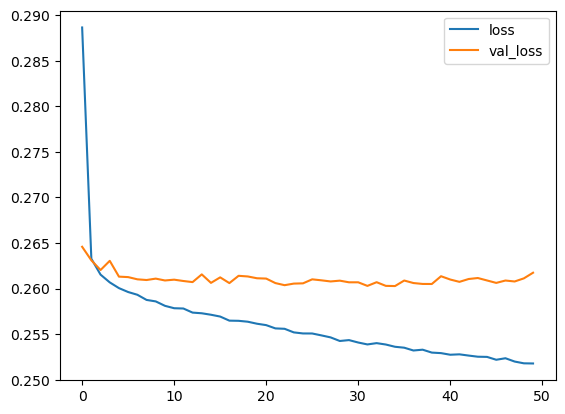

In [72]:
model_history.plot()

In [73]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

2471/2471 [==============================] - 2s 743us/step


In [74]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      0.49      0.63     15658
           1       0.89      0.99      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.89      0.74      0.78     79044
weighted avg       0.89      0.89      0.87     79044



**Due to the imbalance in the dataset, the F1-score for the target class '0' is significantly lower, indicating that the model is biased towards the dominant class '1'. This imbalance negatively impacts the model's ability to accurately identify instances of the minority class. Let's focus on strategies to address this issue and improve the model's performance on the underrepresented class.**

## Model Improvement

In [117]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

**By applying SMOTE, we successfully balanced the two target classes, which is expected to enhance the model's performance. This balanced dataset should lead to a noticeable improvement in accuracy and other evaluation metrics.**

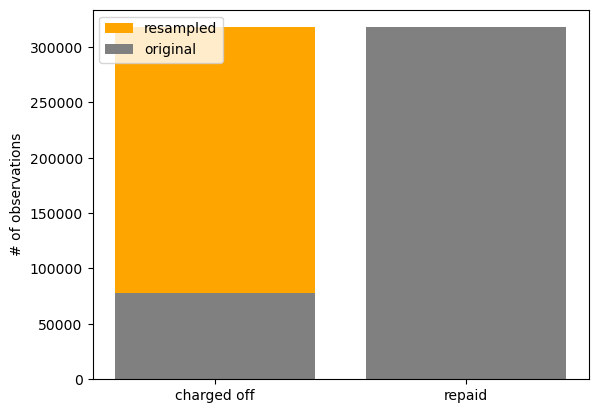

In [128]:
original_data_sizes = [len(y[y==0]), len(y[y==1])]
improved_data_sizes = [len(y_resampled[y_resampled==0]), len(y_resampled[y_resampled==1])]


labels = ["charged off", "repaid"]
plt.bar(labels,improved_data_sizes,color='orange')
plt.bar(labels,original_data_sizes,color='grey')
plt.xticks(labels,["charged off", "repaid"])
plt.ylabel("# of observations")
plt.legend(['resampled','original'])
plt.show()

`Here we see the difference between the sizes of the targets before and after resampling`

In [118]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [119]:
model = Sequential()

model.add(Dense(78, activation = "relu"))
model.add(Dropout(0.2))

model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.2))

model.add(Dense(32, activation = "relu"))
model.add(Dropout(0.2))

model.add(Dense(units = 1, activation = "sigmoid"))

model.compile(loss='binary_crossentropy', optimizer='adam')
early_stop = EarlyStopping(monitor="val_loss", mode = "min", verbose=1, patience=15)

In [121]:
model.fit(x=X_train, y=y_train, 
        epochs=100,
        batch_size=256,
        validation_data=(X_test, y_test), verbose=1,
        callbacks = [early_stop]
        )

Epoch 1/100
1986/1986 [==============================] - 5s 2ms/step - loss: 0.2930 - val_loss: 0.2246
Epoch 2/100
1986/1986 [==============================] - 4s 2ms/step - loss: 0.2330 - val_loss: 0.2093
Epoch 3/100
1986/1986 [==============================] - 4s 2ms/step - loss: 0.2129 - val_loss: 0.1923
Epoch 4/100
1986/1986 [==============================] - 4s 2ms/step - loss: 0.2028 - val_loss: 0.1859
Epoch 5/100
1986/1986 [==============================] - 4s 2ms/step - loss: 0.1962 - val_loss: 0.1863
Epoch 6/100
1986/1986 [==============================] - 4s 2ms/step - loss: 0.1923 - val_loss: 0.1812
Epoch 7/100
1986/1986 [==============================] - 4s 2ms/step - loss: 0.1892 - val_loss: 0.1805
Epoch 8/100
1986/1986 [==============================] - 4s 2ms/step - loss: 0.1868 - val_loss: 0.1817
Epoch 9/100
1986/1986 [==============================] - 4s 2ms/step - loss: 0.1852 - val_loss: 0.1809
Epoch 10/100
1986/1986 [==============================] - 4s 2ms/step - l

In [122]:
model_history = pd.DataFrame(model.history.history)
model_history

,loss,val_loss
0,0.293027,0.224550
1,0.232985,0.209310
2,0.212873,0.192332
3,0.202765,0.185892
4,0.196181,0.186261
5,0.192260,0.181226
6,0.189197,0.180495
7,0.186770,0.181737
8,0.185172,0.180898
9,0.183571,0.176479


<Axes: >

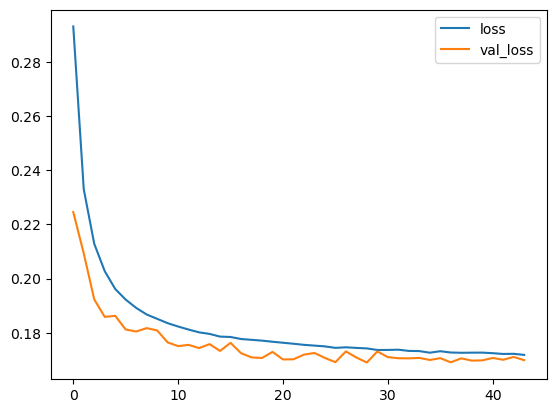

In [123]:
model_history.plot()

In [124]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

3972/3972 [==============================] - 3s 693us/step


In [125]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92     63719
           1       0.87      1.00      0.93     63360

    accuracy                           0.92    127079
   macro avg       0.93      0.92      0.92    127079
weighted avg       0.93      0.92      0.92    127079



### Key Observations Before resampling
- The model's **recall for class `0` or 'charged_off'** was only **49%**, indicating poor identification of the minority class.
- The **F1-score for class `0` or 'charged_off'** (0.63) was significantly lower than for class `1` (0.93), showcasing the bias.
- Overall **accuracy** (0.89) was misleading due to the imbalance, as the model performed well only on the majority class.

---


### Key Improvements After resampling
- **Recall for class `0` or 'charged_off'** increased dramatically from **49% to 85%**, significantly reducing false negatives.
- **F1-score for class `0` or 'charged_off'** rose from **0.63 to 0.92**, indicating a well-balanced precision-recall trade-off.
- Overall **accuracy** improved from **0.89 to 0.92**, reflecting the model's better generalization on both classes.
